In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from numpy import median
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
import matplotlib.lines as mlines
from sklearn import svm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
# Change working directory
#import os
#os.chdir("/Project/ChurnPrediction/")

# Load Dataset
inputPath = "Churn_Modelling.csv"
dataset = pd.read_csv(inputPath, header=0)
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
# Categorical data points exploration
# Gender, Geography are the useful data points, where as surname is of no significance for the model.

dataset.groupby("Gender")["Geography"].count()
dataset.groupby("Geography")["Gender"].count()
# Conversion of categorical values into numerical levels
dataset["Gender1"] = dataset["Gender"]
dataset["Gender"] = pd.Categorical(dataset["Gender"])
dataset["Gender"] = dataset["Gender"].cat.codes
dataset.head()

dataset["Geography1"] = dataset["Geography"]
dataset["Geography"] = pd.Categorical(dataset["Geography"])
dataset["Geography"] = dataset["Geography"].cat.codes
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender1,Geography1
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,Female,France
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0,Female,Spain
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,Female,France
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,Female,France
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0,Female,Spain


In [6]:
# Age binning
dataset["AgeBin"] = pd.cut(dataset['Age'], [0, 16, 32,48,64,500])
dataset["AgeBin"] = pd.Categorical(dataset["AgeBin"])
dataset["AgeBin"] = dataset["AgeBin"].cat.codes
dataset.loc[dataset["Age"] > 60].head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender1,Geography1,AgeBin
42,43,15687946,Osborne,556,0,0,61,2,117419.35,1,1,1,94153.83,0,Female,France,3
44,45,15684171,Bianchi,660,2,0,61,5,155931.11,1,1,1,158338.39,0,Female,Spain,3
58,59,15623944,T'ien,511,2,0,66,4,0.00,1,1,0,1643.11,1,Female,Spain,4
85,86,15805254,Ndukaku,652,2,0,75,10,0.00,2,1,1,114675.75,0,Female,Spain,4
104,105,15804919,Dunbabin,670,2,0,65,1,0.00,1,1,1,177655.68,1,Female,Spain,4


In [7]:

# Binning credit score
dataset['CreditScoreBin'] = pd.cut(dataset['CreditScore'], [0, 450, 550,650,750,900])

dataset["CreditScoreBin"] = pd.Categorical(dataset["CreditScoreBin"])
dataset["CreditScoreBin"] = dataset["CreditScoreBin"].cat.codes
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender1,Geography1,AgeBin,CreditScoreBin
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,Female,France,2,2
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0,Female,Spain,2,2
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,Female,France,2,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,Female,France,2,3
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0,Female,Spain,2,4


In [8]:
# Binning Balance
dataset['BalanceBin'] = pd.cut(dataset['Balance'], [-1, 50000, 100000,150000,200000,1000000000000000])

dataset["BalanceBin"] = pd.Categorical(dataset["BalanceBin"])
dataset["BalanceBin"] = dataset["BalanceBin"].cat.codes
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender1,Geography1,AgeBin,CreditScoreBin,BalanceBin
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,Female,France,2,2,0
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0,Female,Spain,2,2,1
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,Female,France,2,1,3
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,Female,France,2,3,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0,Female,Spain,2,4,2


In [9]:
# Binning Estimated Salary
dataset['EstimatedSalaryBin'] = pd.cut(dataset['EstimatedSalary'], [-1, 50000, 100000,150000,200000,1000000000000000])

dataset["EstimatedSalaryBin"] = pd.Categorical(dataset["EstimatedSalaryBin"])
dataset["EstimatedSalaryBin"] = dataset["EstimatedSalaryBin"].cat.codes
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender1,Geography1,AgeBin,CreditScoreBin,BalanceBin,EstimatedSalaryBin
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,Female,France,2,2,0,2
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0,Female,Spain,2,2,1,2
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,Female,France,2,1,3,2
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,Female,France,2,3,0,1
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0,Female,Spain,2,4,2,1


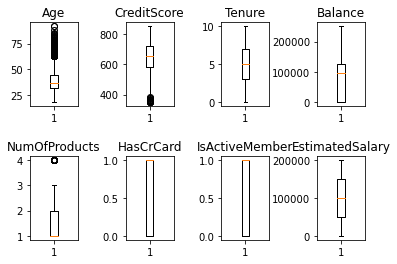

In [10]:
# Box plot
fig, ((a,b,c,d),(e,f,g,h)) = plt.subplots(2,4)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=1, hspace=0.6)

a.set_title("Age")
a.boxplot(dataset["Age"])
b.set_title("CreditScore")
b.boxplot(dataset["CreditScore"])
c.set_title("Tenure")
c.boxplot(dataset["Tenure"])
d.set_title("Balance")
d.boxplot(dataset["Balance"])
e.set_title("NumOfProducts")
e.boxplot(dataset["NumOfProducts"])
f.set_title("HasCrCard")
f.boxplot(dataset["HasCrCard"])
g.set_title("IsActiveMember")
g.boxplot(dataset["IsActiveMember"])
h.set_title("EstimatedSalary")
h.boxplot(dataset["EstimatedSalary"])
plt.show()

In [11]:
# Drop the columns that are neccesary/ significant for the modeling
#dataset.drop(["Surname","RowNumber", "CustomerId", "Gender1","Geography1", "Age"], inplace =True, axis = 1)
dataset1 = dataset.copy()
#dataset.drop("Surname", inplace =True, axis = 1)

In [12]:
dataset.drop(["Surname", "Gender1","Geography1"], inplace =True, axis = 1)

In [13]:
# Correlation
dataset.corr()["Exited"]

RowNumber            -0.016571
CustomerId           -0.006248
CreditScore          -0.027094
Geography             0.035943
Gender               -0.106512
Age                   0.285323
Tenure               -0.014001
Balance               0.118533
NumOfProducts        -0.047820
HasCrCard            -0.007138
IsActiveMember       -0.156128
EstimatedSalary       0.012097
Exited                1.000000
AgeBin                0.256200
CreditScoreBin       -0.031312
BalanceBin            0.117289
EstimatedSalaryBin    0.013660
Name: Exited, dtype: float64

In [14]:
X = dataset.drop(dataset["Exited"])
y = dataset["Exited"]

In [15]:
y = y.drop([0,1])
print(len(X), len(y))

9998 9998


In [16]:
X.isnull().sum()

RowNumber             0
CustomerId            0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
AgeBin                0
CreditScoreBin        0
BalanceBin            0
EstimatedSalaryBin    0
dtype: int64

In [17]:
print(dataset.shape, X.shape,y.shape)

(10000, 17) (9998, 17) (9998,)


In [18]:
# Split data into train and test datasets
X = dataset.drop(dataset["Exited"])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
#feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X_train,y_train)

#print(fit.scores_)
d = {'columnName': X_train.columns.values, 'featureScore': fit.scores_}
df = pd.DataFrame(data=d)
print(df.sort_values(['featureScore'], ascending=False))

            columnName  featureScore
7              Balance  4.710450e+06
11     EstimatedSalary  2.427453e+04
12              Exited  5.305000e+03
5                  Age  1.579040e+03
13              AgeBin  1.249478e+02
2          CreditScore  1.086028e+02
0            RowNumber  9.753064e+01
15          BalanceBin  8.415139e+01
10      IsActiveMember  7.565394e+01
1           CustomerId  6.253999e+01
4               Gender  3.244226e+01
3            Geography  7.375196e+00
6               Tenure  3.777061e+00
8        NumOfProducts  3.579410e+00
14      CreditScoreBin  3.556878e+00
16  EstimatedSalaryBin  7.829944e-01
9            HasCrCard  2.747963e-01


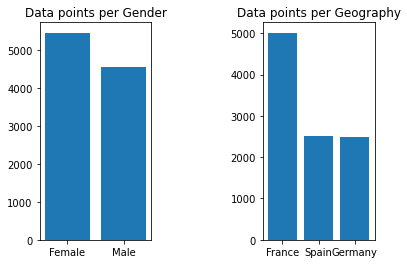

In [20]:
fig, ((a,b)) = plt.subplots(1,2)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=1, hspace=1)
a.set_title("Data points per Gender")
a.bar(dataset1["Gender1"].unique(),dataset1.iloc[:,14].value_counts())
b.set_title("Data points per Geography")
b.bar(dataset1["Geography1"].unique(),dataset1.iloc[:,15].value_counts())
plt.show()

In [21]:
# Remove the non-necessary fields
dataset1 = dataset.copy()
dataset.drop(["CustomerId","RowNumber","Age","CreditScore","Balance","EstimatedSalary"], axis=1, inplace =True)

In [22]:
dataset.head()

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,AgeBin,CreditScoreBin,BalanceBin,EstimatedSalaryBin
0,0,0,2,1,1,1,1,2,2,0,2
1,2,0,1,1,0,1,0,2,2,1,2
2,0,0,8,3,1,0,1,2,1,3,2
3,0,0,1,2,0,0,0,2,3,0,1
4,2,0,2,1,1,1,0,2,4,2,1


In [23]:
# Random shuffle of records 
dataset = dataset.sample(frac=1).reset_index(drop=True)

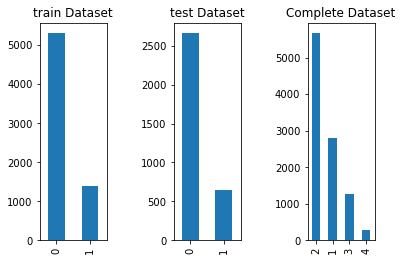

In [24]:
# Check the distribution of Exited in train & Test datasets
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=1, hspace=1)
plt.subplot(1,3,1)
y_train.iloc[:].value_counts().plot(kind = 'bar',title="train Dataset")
plt.subplot(1,3,2)
y_test.iloc[:].value_counts().plot(kind = 'bar',title="test Dataset")
plt.subplot(1,3,3)
dataset.iloc[:,7].value_counts().plot(kind = 'bar',title="Complete Dataset")
plt.show()

accuracy: 0.805
0.5835104430855788


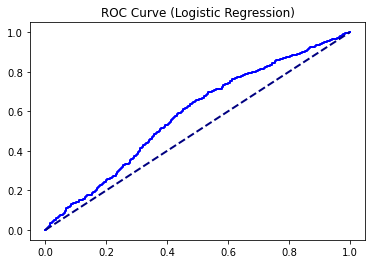

In [25]:
# Build model
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)


# Accuracy metrics
#print(Y_pred)
acc_log = round(logreg.score(X_test, y_test), 3)
print("accuracy:", acc_log)

# Prediction
y_pred = logreg.predict(X_test)
# Confusion Matrix
confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

# ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr,tpr)
print(roc_auc)

plt.title("ROC Curve (Logistic Regression)")
plt.plot(fpr, tpr, color='blue',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()

0.7884738865791292


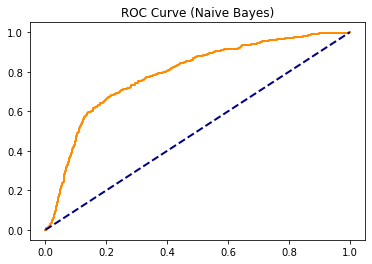

In [26]:
# Naive Bayes classification

gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train,
    y_train
)
y_pred = gnb.predict(X_test)

accuracy_score(y_test,y_pred)

# ROC curve

fpr = dict()
tpr = dict()
roc_auc = dict()

y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr,tpr)
print(roc_auc)

plt.title("ROC Curve (Naive Bayes)")
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()


0.5734445998158567


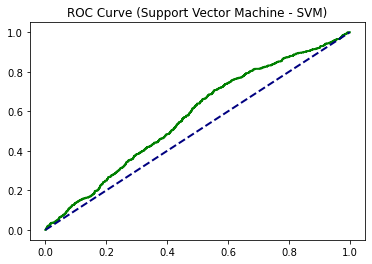

In [27]:
# SVM
model_svm = svm.SVC(probability=True)
model_svm.fit(X_train, y_train)
# Predict SVM
y_pred = model_svm.predict(X_test)
# model_svm.support_vectors_


# ROC curve

fpr = dict()
tpr = dict()
roc_auc = dict()

y_pred_proba = model_svm.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr,tpr)
print(roc_auc)

plt.title("ROC Curve (Support Vector Machine - SVM)")
plt.plot(fpr, tpr, color='green',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()

{0: 0.5835104430855788, 1: 0.7884738865791292, 2: 0.5734445998158567}


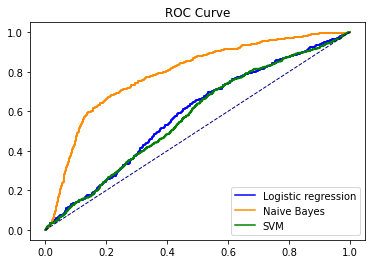

In [28]:
# ROC comparision among 3 models

fpr = dict()
tpr = dict()
roc_auc = dict()

y_pred_proba_glm = logreg.predict_proba(X_test)[::,1]
y_pred_proba_nb = gnb.predict_proba(X_test)[::,1]
y_pred_proba_svm = model_svm.predict_proba(X_test)[::,1]

fpr[0], tpr[0], thresholds_glm = roc_curve(y_test, y_pred_proba_glm)
fpr[1], tpr[1], thresholds_nb = roc_curve(y_test, y_pred_proba_nb)
fpr[2], tpr[2], thresholds_svm = roc_curve(y_test, y_pred_proba_svm)

roc_auc[0] = auc(fpr[0],tpr[0])
roc_auc[1] = auc(fpr[1],tpr[1])
roc_auc[2] = auc(fpr[2],tpr[2])
print(roc_auc)
colors = ['blue', 'darkorange','green']
titles = ["Logistic","Naive Bayes","SVM"]
plt.title("ROC Curve")
for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i],lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])
# Labels inside the plot area (ROC Curve)    
blue_line = mlines.Line2D([], [], color='blue', label='Logistic regression')
orange_line = mlines.Line2D([], [], color='darkorange', label='Naive Bayes')
green_line = mlines.Line2D([], [], color='green', label='SVM')
plt.legend(handles=[blue_line, orange_line,green_line])
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.show()